# Homework: Mandelbrot Set

## Objectives

- Practice working with NumPy arrays
- Implement numerical array computations without `for` or `while` loops


## Background

One of the most popular mathematical fractals (self-similar patterns at increasingly small scales) is the [Mandelbrot Set](https://en.wikipedia.org/wiki/Mandelbrot_set). This is a subset of the complex numbers for which a simple iterative computation (executed arbitrary number of times) remains bounded, i.e. produces a finite value within a preset bound. 

To decide if a complex number ($c$) is inside of the Mandelbrot Set, one evaluates the following iterative computation:

$$ z_0 = 0 $$
$$ z_{n+1} = z_{n}^2 + c $$

If the magnitude (absolute value) of $z_n$ ($\lvert z_n \rvert$) remains at or below `2`, the original $c$ complex number is inside the set.

The popularity of this set is due to the interesting visual patterns, if the the complex values and their set membership are shown on 2D plane. 

The actual algorithm for generating such and image is relatively simple:

1. Select a region (`c_topleft`, `c_bottomright`) on the complex plane and the resolution of the image.

2. Compute the complex grid points based on the region and the resolution.

3. For each grid point, execute the iterative algorithm above for `MAX_ITERATION` times. If during the iteration the $\lvert z_n \rvert$ value becomes larger than `2`, the point is not in the set

4. For each grid point visualize the set membership with a color

    Option 1: The pixel is `black` if the corresponding complex value is in the set, otherwise, the pixel is `white`.
    
    Option 2: Use a color scale to visualize the number of steps it took for the the given complex value to cross the threshold of `2`.

**Try to understand each step, and make sure you provide code solutions and/or text inputs for each `#TODO` item (replacing `#TODO` with your input).**

## Step 1: Setup (10 pts)
Please, provide your VUnetID. Also, if you need to import any additional Python modules (you can come back here later), add those import statements in the following code cell.

**VUnetID** : senths1

In [2]:
# Import statements
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Step 2: Create the complex grid (25 pts)

Finish the code cell below, by assigning a 2D array with a shape of `(RES_X, RES_Y)` to variable `c`. Each value of the array should be a complex number, creating a uniformly sampled grid between `c_topleft` and `c_bottomright`. 

Hint: try to use `np.linspace` with broadcasting or `np.meshgrid`. The `c` grid should look like this (showing the some values at the opposite corners):

```python
[
    [-2+1.4j,       -1.9971972+1.4j,       -1.99439439+1.4j,       ...]
    [-2+1.3971972j, -1.9971972+1.3971972j, -1.99439439+1.3971972j, ...]
    ...
    [...,  0.79439439-1.3971972j, 0.7971972 -1.3971972j, 0.8-1.3971972j]
    [...,  0.79439439-1.4j,       0.7971972-1.4j,        0.8-1.4j]
]
```

As you can see, the _real_ parts of the complex numbers are stepped across the columns, while the _imaginary_ parts are swept through the rows. If you have a complex value (or NumPy array with complex values), you can access the _real_ and _imaginary_ parts using the `.real` and `.imag` properties. Also, to build a complex number from two floating point numbers (`a` and `b`, where `b` represents the imaginary part), you can use the `a + 1j * b` expression (notice, that you build the imaginary part by multiplying with `1j`).

Finally, try to do this experiment with the following example (observe the variables and the final result):

```python
import numpy as np
x = np.arange(5) * 100
y = np.arange(5).reshape((5, 1))
x + y
```

Obviously, you may want to use `linspace` instead of `arange` and complex/imaginary numbers (instead of the 100 scaling), but this should give you some ideas on how to leverage the broadcasting rules to create a 2D grid.

In [3]:
RES_X, RES_Y = 1000, 1000
MAX_ITERATION = 20
c_topleft = -2+1.4j
c_bottomright = 0.8-1.4j

# creates the complex grid
real = np.linspace(-2, 0.8, RES_X) #row vectors
imag = np.linspace(1.4 * 1j, -1.4 * 1j, RES_Y) #column vectors
real_x = real.reshape((1, RES_X))
imag_y = imag.reshape((RES_Y, 1))
c = real_x + imag_y

## Step 3: Initialize the $z$ and $d$ arrays  (10 pts)

Create a `z` array, which has the same shape as `c`, but all values are initially set to `0`.
Also, create a `d` array, which has the same shape as `c`. This array will be used to keep track of how many iteration steps were needed for $\lvert z_n \rvert$ to cross the threshold.  Hint: use the `np.zeros_like()` and/or `np.ones_like()` functions. Also, because the `d` array stores the number of iterations, make sure that the values are of an integer data type (e.g. you can specify `dtype=np.int` as an optional paramter for array creation functions.)

In [4]:
# z array has zeros + same shape + format as c
z = np.zeros_like(c)

# d array has the same size as c
d = np.zeros_like(c, dtype=int)

## Step 4: Run the iterative algorithm (50 pts)

Execute a loop of `MAX_ITERATION` steps. In each iteration compute the new `z` value and update the `d` values. For the `z` value update you use the $ z_{n+1} = z_{n}^2 + c $ formula. For updating `d` you need to check if this is the first time when the computed $\lvert z_n \rvert$ value crossed the threshold of `2`. If this is the case, update `d` to the for loop iteration variable, otherwise keep it at the original (`MAX_ITERATION`) value. 

Hint: you can use `np.absolute()` to compute the magnitude of complex numbers. Also, you can use boolean indexing ( _masking_ ) to update `d`. Also, some of the values in the `z` array will grow very fast and will create numerical overflows. You may ignore those warnings (or, if you are a perfectionist, you can use boolean indexing ( _masking_ ) to compute and update only those `z` values, which are still below the absolute threshold). 

**Important: you have to use array computation for doing these updates. The only `for` loop in this cell is for the `MAX_ITERATION` steps. In other words, you are not allowed to go through the arrays with explicit for loops.** If you cannot solve the algorithm without explicit for loops, max. 30 pts will be given. 


In [5]:
for each_step in range(0, MAX_ITERATION):
    z = (z**2) + c # computing the new z
    abz = np.absolute(z) # absolute value of z
    d[abz < 2] = each_step #updating the d values

/var/folders/jn/k9lbtzcn0b34bmwn9q0mgnm00000gn/T/ipykernel_68751/3532400394.py:2: RuntimeWarning: overflow encountered in square
  z = (z**2) + c # computing the new z
/var/folders/jn/k9lbtzcn0b34bmwn9q0mgnm00000gn/T/ipykernel_68751/3532400394.py:2: RuntimeWarning: invalid value encountered in square
  z = (z**2) + c # computing the new z
/var/folders/jn/k9lbtzcn0b34bmwn9q0mgnm00000gn/T/ipykernel_68751/3532400394.py:3: RuntimeWarning: overflow encountered in absolute
  abz = np.absolute(z) # absolute value of z


## Step 5: Visualize the results (5 pts)

Use `plt.imshow()` to visualize the results (i.e. the iteration numbers, when the $\lvert z_n \rvert$ values crossed the threshold)


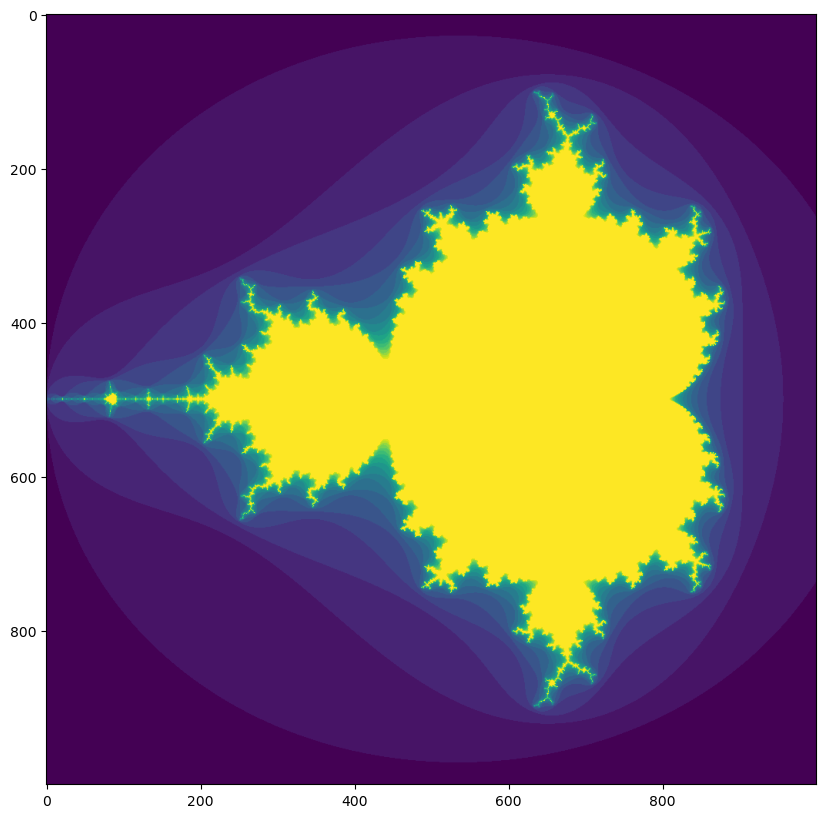

In [6]:
plt.figure(figsize=(10, 10))
plt.imshow(d)

## Grading

In this assignment you will not have access to an autograder program (i.e. _validator_ ). Your work will be inspected and graded manually. Make sure you took care of every `#TODO` items in your assignment. Also, verify, that your notebook document can be executed sequentially from a clean state. You can do this by using the _"Kernel/Restart & Run All"_ menu item and checking your results.

### Penalties

Your work will not be checked for PEP8 style problems. Still, try to write readable and concise code.

## Submission

Please, upload the final version of this notebook file (`mandelbrot.ipynb`) to Brightspace.